## Merged df EDA

#### import data

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [58]:
df = pd.read_csv('../merged_df/merged_df.csv', sep=",", index_col=0)
df['date'] = pd.to_datetime(df['date'])

In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5255 entries, 0 to 5254
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    5255 non-null   object        
 1   title                  5255 non-null   object        
 2   date                   5255 non-null   datetime64[ns]
 3   author                 5255 non-null   object        
 4   description            5255 non-null   object        
 5   text                   5255 non-null   object        
 6   Article Length         5255 non-null   float64       
 7   sentiment              5255 non-null   float64       
 8   sentiment_label        5255 non-null   object        
 9   Stock                  5255 non-null   object        
 10  Open                   5255 non-null   float64       
 11  Low                    5255 non-null   float64       
 12  Close                  5255 non-null   float64       
 13  Adjusted

In [60]:
# Summary statistics for numerical columns
print(df.describe())

                                date  Article Length    sentiment  \
count                           5255     5255.000000  5255.000000   
mean   2021-11-29 05:22:31.627021824      695.974881     2.619600   
min              2015-02-24 00:00:00      151.000000     1.000000   
25%              2020-10-13 12:00:00      388.500000     1.000000   
50%              2022-06-07 00:00:00      602.000000     2.000000   
75%              2023-05-16 00:00:00      865.000000     4.000000   
max              2023-12-29 00:00:00     5369.000000     5.000000   
std                              NaN      478.626791     1.328338   

              Open          Low        Close  Adjusted_Close        Volume  \
count  5255.000000  5255.000000  5255.000000     5255.000000  5.255000e+03   
mean    257.066463   251.685050   254.527387      250.940109  2.976656e+07   
min      41.470001    40.610001    41.380001       36.053192  8.989200e+06   
25%     215.289993   211.080002   213.254997      207.037933  2.16

In [61]:
# Check for missing values
print(df.isnull().sum())

url                      0
title                    0
date                     0
author                   0
description              0
text                     0
Article Length           0
sentiment                0
sentiment_label          0
Stock                    0
Open                     0
Low                      0
Close                    0
Adjusted_Close           0
Volume                   0
Month                    0
Price_Change_Pct         0
Adjusted_Close_Change    0
dtype: int64


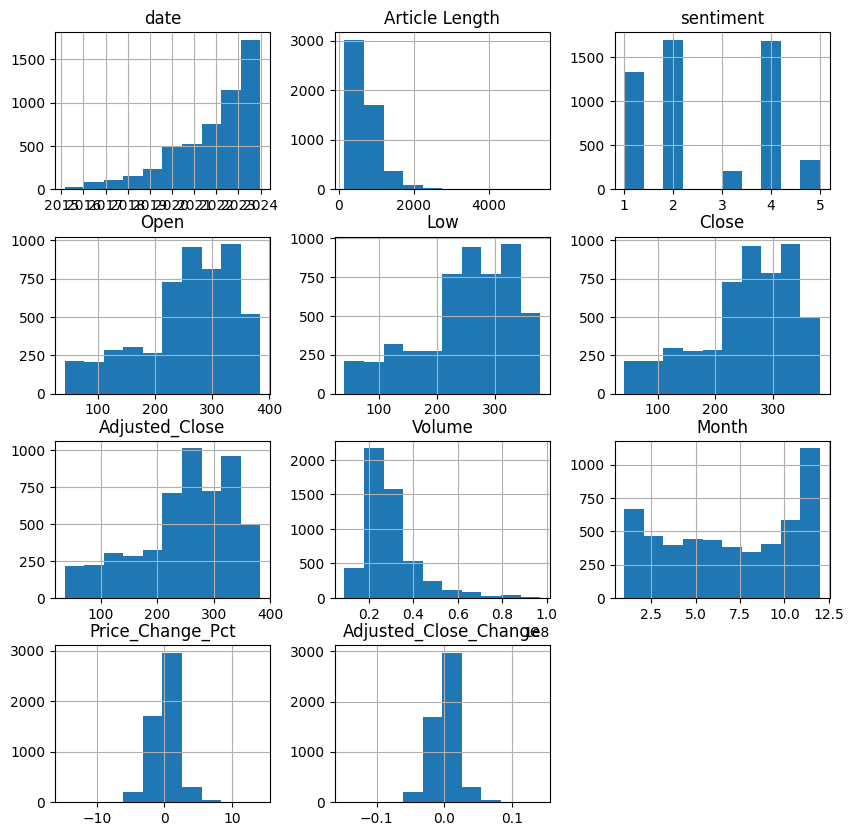

In [62]:
# Histograms for numerical columns
df.hist(figsize=(10, 10))
plt.show()

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


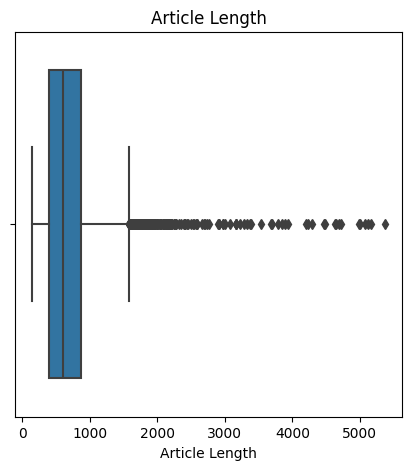

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


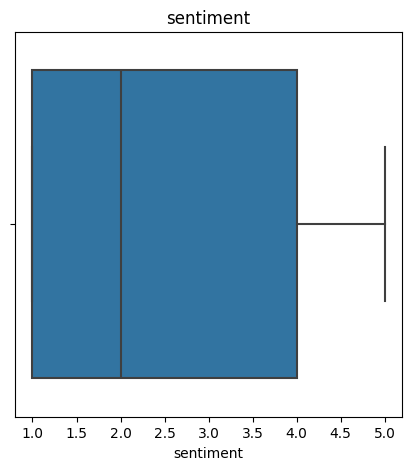

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


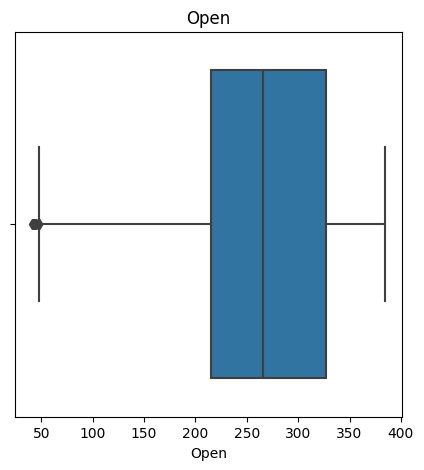

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


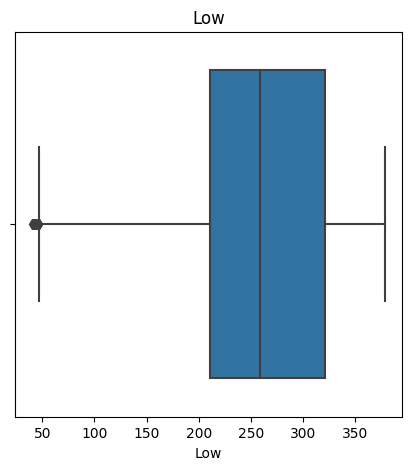

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


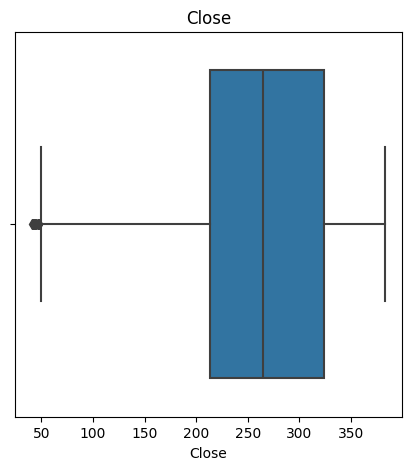

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


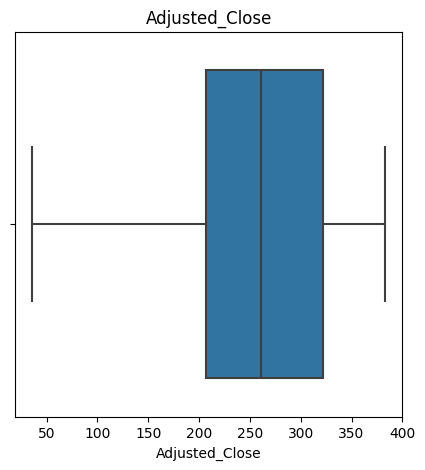

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


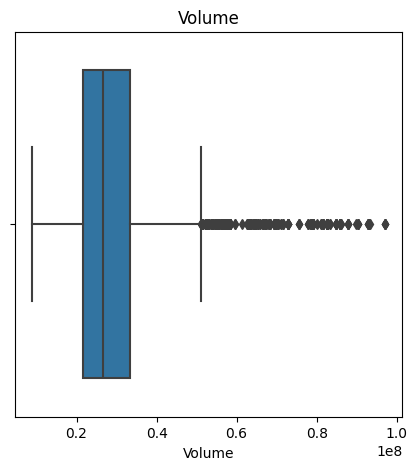

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


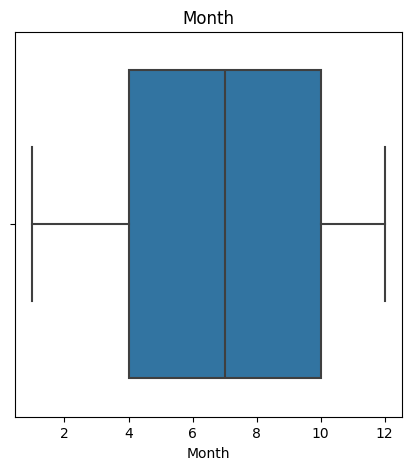

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


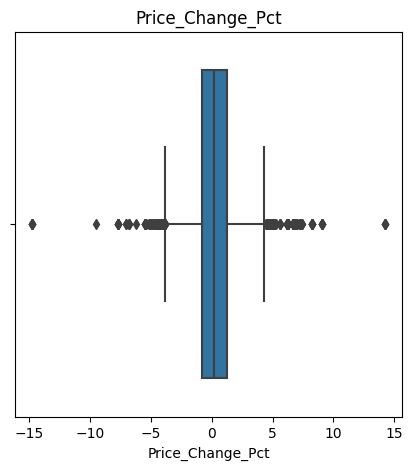

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


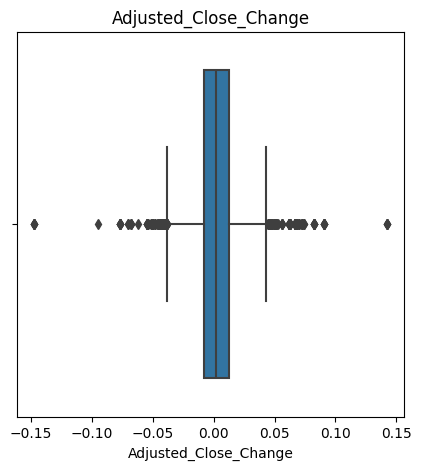

In [63]:
# Box plots for numerical columns to identify outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()


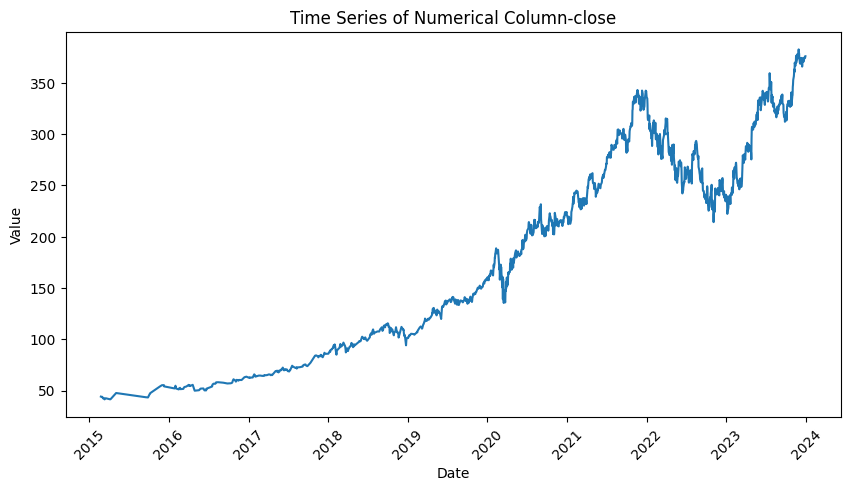

In [64]:
# Time series plot example for a datetime and a numerical column
# Replace 'datetime_column' and 'numerical_column' with actual column names

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Close'])
plt.title('Time Series of Numerical Column-close')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()



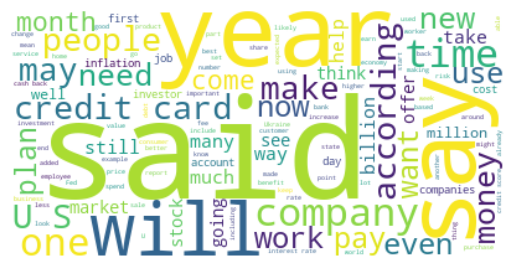

In [65]:
# Word Cloud for a textual column
# Replace 'text_column' with your actual text column name
text = " ".join(review for review in df.text.dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [66]:
# Select only the numerical columns from the DataFrame
df_numerical = df.select_dtypes(include=['int64', 'float64'])

corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,Article Length,sentiment,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
Article Length,1.000000,0.072485,-0.002858,-0.002950,-0.002665,-0.003878,-0.007879,0.023553,0.003067,0.003090
sentiment,0.072485,1.000000,-0.045506,-0.042392,-0.044384,-0.045020,-0.070700,0.024224,0.004951,0.005023
Open,-0.002858,-0.045506,1.000000,0.999404,0.999519,0.999348,-0.130503,0.287101,-0.004796,-0.005108
Low,-0.002950,-0.042392,0.999404,1.000000,0.999519,0.999350,-0.153289,0.294877,-0.004650,-0.004936
Close,-0.002665,-0.044384,0.999519,0.999519,1.000000,0.999805,-0.141935,0.290742,0.013806,0.013505
Adjusted_Close,-0.003878,-0.045020,0.999348,0.999350,0.999805,1.000000,-0.142607,0.292942,0.013010,0.012715
Volume,-0.007879,-0.070700,-0.130503,-0.153289,-0.141935,-0.142607,1.000000,-0.273090,0.004568,0.004012
Month,0.023553,0.024224,0.287101,0.294877,0.290742,0.292942,-0.273090,1.000000,-0.023147,-0.022854
Price_Change_Pct,0.003067,0.004951,-0.004796,-0.004650,0.013806,0.013010,0.004568,-0.023147,1.000000,0.999860
Adjusted_Close_Change,0.003090,0.005023,-0.005108,-0.004936,0.013505,0.012715,0.004012,-0.022854,0.999860,1.000000


C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Half Correlation Heatmap with Values')

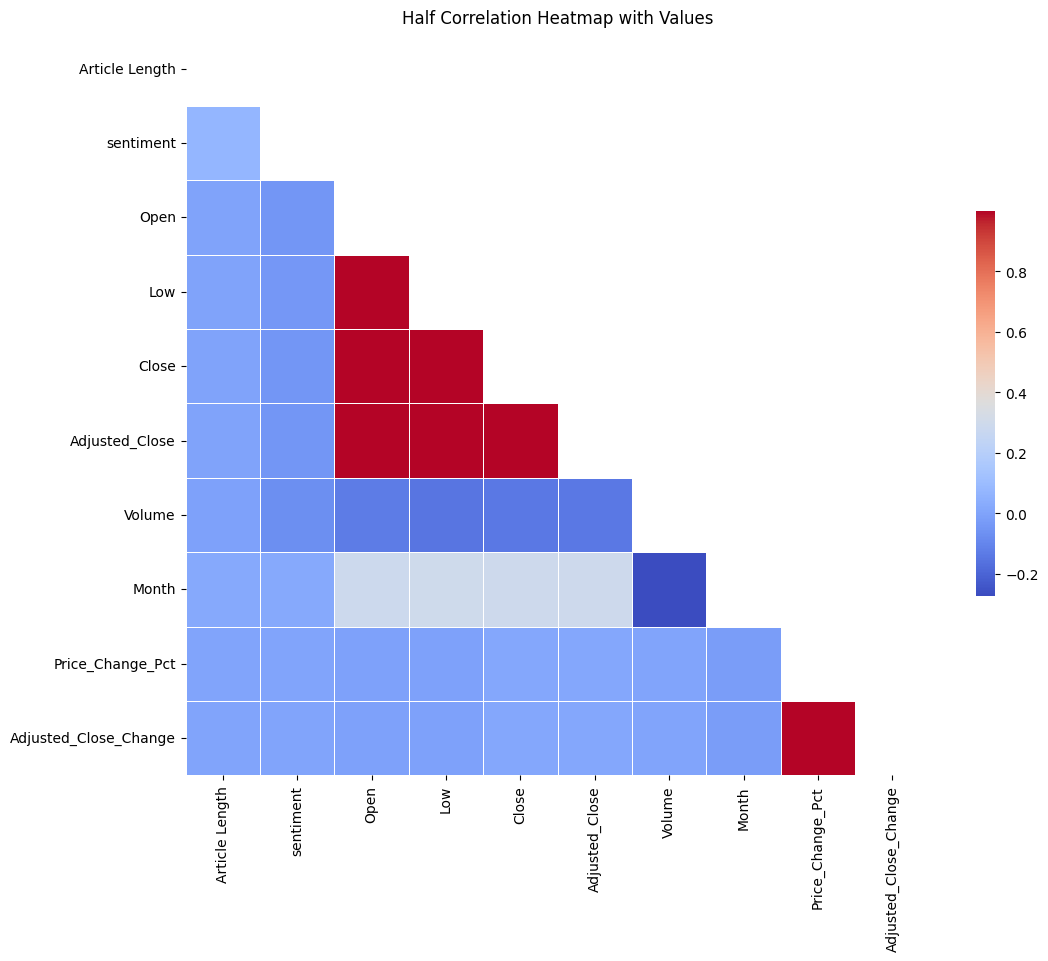

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


df_numerical = df.select_dtypes(include=['int64', 'float64'])
# Assuming df is your DataFrame with numerical data
# Calculate the correlation matrix
corr = df_numerical.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure with a specified size
plt.figure(figsize=(12, 10))

# Create the heatmap with the mask, displaying correlation values
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, square=True, cbar=True,
            cbar_kws={"shrink": 0.5, "orientation": "vertical"})

# Add a title to the plot
plt.title("Half Correlation Heatmap with Values")

# Display the plo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#df['Date'] = pd.to_datetime(df['Date'])


X = df.drop(['Price_Change_Pct','date'], axis=1) 
y = df['Price_Change_Pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor 


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

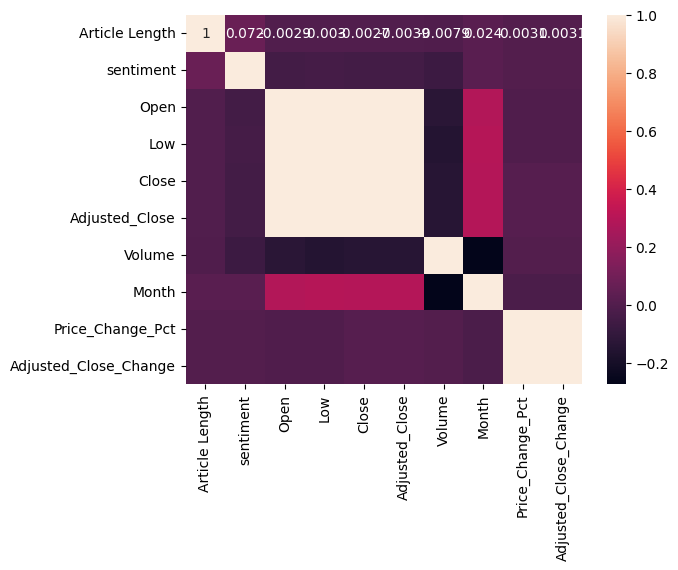

In [74]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

#plotting the heatmap for correlation
ax = sns.heatmap(df_numerical.corr(), annot=True)

In [67]:
df.head()

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,https://www.cnbc.com/2015/02/24/apples-record-...,Apple’s record rally depends on Obama?,2015-02-24,John Melloy,The size of Apple's capital return program wil...,In order for Apple to extend its 21 percent ra...,499.0,1.0,very negative,MSFT,44.299999,43.919998,44.090000,38.414326,25271700.0,2.0,-0.135903,-0.001359
1,https://www.cnbc.com/2015/02/25/dockers-rise-f...,Docker's rise from sleeper to open source king,2015-02-25,Ari Levy,Docker spent 2014 partnering with the world's ...,"In December 2013, Google announced that its c...",777.0,1.0,very negative,MSFT,44.090000,43.799999,43.990002,38.327202,29759800.0,2.0,-0.226805,-0.002268
2,https://www.cnbc.com/2015/03/02/apple-value-to...,Apple value to hit $1 trillion in 1 year,2015-03-02,John Melloy,Apple will rise to $1 trillion in market value...,Apple will rise to $1 trillion in market value...,592.0,2.0,negative,MSFT,44.189999,43.549999,43.880001,38.231373,31924000.0,3.0,0.068421,0.000684
3,https://www.cnbc.com/2015/03/05/is-apple-world...,"Is Apple, world’s largest stock, ‘underowned’?",2015-03-06,John Melloy,A top Wall Street strategist makes the case th...,"Jason Trennert, a top Wall Street strategist, ...",1112.0,4.0,positive,MSFT,43.110001,42.150002,42.360001,36.907036,36248800.0,3.0,-1.739736,-0.017397
4,https://www.cnbc.com/2015/03/09/apple-may-sell...,Apple may sell 1 billion 'life-saving' watches,2015-03-09,John Melloy,CNBC Pro Preview: Influential technology analy...,The following is a free preview of the content...,506.0,1.0,very negative,MSFT,43.130001,42.189999,42.849998,37.333958,32108000.0,3.0,1.156747,0.011567


In [68]:
# Pairplot for a subset of numerical columns
# sns.pairplot(df[['numerical_column1', 'numerical_column2', 'numerical_column3']])
# plt.show()



In [69]:
# Bar plot for a categorical column
# sns.countplot(y='categorical_column', data=df)
# plt.title('Distribution of Categories')
# plt.show()